# data loading and wrangling

In [141]:
import pandas as pd
import numpy as np
from numpy import mean
dt=pd.read_csv('E:\\python\\creditcard.csv')

In [142]:
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [143]:
dt.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [144]:
len(dt)

284807

In [145]:
y=dt['Class']# label set
Y=np.array(y)
dt1=dt.drop(['Class','Time','Amount'],axis=1)#features set

# data plot

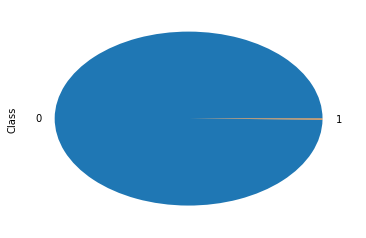

Number of 0s and 1s:->>

 0    284315
1       492
Name: Class, dtype: int64

percentage of distributions:->>

 0    0.998273
1    0.001727
Name: Class, dtype: float64


In [146]:
import matplotlib.pyplot as plt
dt.Class.value_counts().plot(kind='pie')
plt.show()
print('Number of 0s and 1s:->>\n\n',dt.Class.value_counts())
print('\npercentage of distributions:->>\n\n',dt.Class.value_counts(normalize=True))

# Logistic regression algorithm scratch code

In [147]:
m=len(dt)#length
n=28#number of columns
def create_new_array(len_data,n_cols):
    x=np.ones((m,n+1))
    for i in range(len(dt1)):
        x[i,1:]=dt1.iloc[i,:]
    return x

In [148]:
x=create_new_array(m,n)

In [149]:

def sigmoid(x,theta):#sigmoid fun
    z=np.matmul(x,theta)
    return 1/(1+np.exp(-z))

#def normalize(x):
#    min=np.min(x,axis=0)
#    max=np.max(x,axis=0)
#    rng=max-min
#   norm=1-((x-min)/rng)
#   return norm

def grad_descent(x,y,alpha,iteration):
    theta=(np.zeros(n+1))
    #b = np.zeros((m,1))

    for i in range(iteration):
        h=sigmoid(x,theta)
        gradient=(np.matmul(x.T,(h-y)))/m
        theta=theta-alpha*gradient
        loss=(-y*np.log(h)-(1-y)*np.log(1-h)).mean()
        
        if i%1000==0:
            print(loss)
    return theta


#def classify(x,theta):
#    prediction=sigmoid(x,theta)
#    if prediction>=0.5:
#       return 1
#   else: 
#       return 0
   


# Data splitting and training

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(np.array(x),np.array(y),train_size=0.8,test_size=0.2)

In [151]:
th=grad_descent(x_train,y_train,0.001,18000)
th

0.6931471805599451
0.5286044321309452
0.41687537174145795
0.3389292645798902
0.2827981351449348
0.24110613930000713
0.20925810666621028
0.1843227386627938
0.16437740599252243
0.14812523520183069
0.13466793097933782
0.12336790366609532
0.11376246480924926
0.10550906344510058
0.09834947818803168
0.09208586654445627
0.08656440445530453
0.08166389165204431


array([-2.54228768e+00, -1.46753928e-02,  1.69048997e-02, -3.70338893e-02,
        2.86122722e-02, -1.70730336e-02, -9.98016509e-03, -3.97544325e-02,
        1.27945083e-03, -2.32010466e-02, -5.13670007e-02,  3.54385588e-02,
       -6.10392557e-02, -1.42111151e-03, -7.42731476e-02, -6.52474512e-04,
       -4.60096024e-02, -7.30487732e-02, -2.57303422e-02,  7.34197688e-03,
        3.64649627e-03,  9.33378027e-03,  1.62281055e-03,  1.08320757e-03,
       -1.20486271e-03,  8.05178325e-04,  2.14858873e-03,  2.81386572e-03,
        2.67211480e-03])

# Prediction

In [152]:
predicted_class=sigmoid(x_test,th)
predicted_class

array([0.07934191, 0.068504  , 0.07282493, ..., 0.07222702, 0.07026125,
       0.07158451])

# Acuracy calculation from scratch

In [ ]:
pred=[]
for i in sigmoid(x_test,th):
    if i>=0.5:
        pred.append(1)
    else:
        pred.append(0)
np.array(pred)

In [154]:
c=0
t=0
for i in pred:
    if pred[i]==Y[i]:
        c+=1
    t+=1
accuracy=c/t
print("accuracy=%0.2f percent"%(accuracy*100))

accuracy=100.00 percent


# Zeros and ones in test data

In [155]:
i=0
j=0
for k in range(len(pred)):
    if pred[k]==0:
        j=j+1
    elif pred[k]==1:
        i=i+1
print('{} number of zeros , {} number of ones'.format(j,i))
print('total number of data is {}'.format(i+j))
len(dt)

56911 number of zeros , 51 number of ones
total number of data is 56962


284807

# zeros and ones in original data

In [156]:
j=0
k=0
for i in range(len(Y)):
    if Y[i]==0:
        j=j+1
    elif Y[i]==1:
        k=k+1
print('{} number of zeros , {} number of ones'.format(j,k))
print('total number of data is {}'.format(k+j))    

284315 number of zeros , 492 number of ones
total number of data is 284807


# Final result 

accuracy score: 0.9990871107053826

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.84      0.49      0.62        87

    accuracy                           1.00     56962
   macro avg       0.92      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962

******Heatmap of CONFUSION MATRIX is shown below******



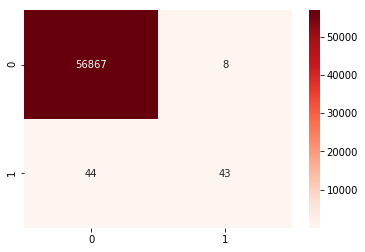

In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import seaborn as sns
cm=confusion_matrix(y_test,pred)
print('accuracy score:',accuracy_score(y_test,pred))
print('\nclassification report:\n',classification_report(y_test,pred))
print('******Heatmap of CONFUSION MATRIX is shown below******\n')
sns.heatmap(cm,annot=True,cmap='Reds',fmt='d')